In [2]:
#Data visualization example
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as ET
from PIL import Image

In [3]:
#parses the xml_file for label and bbox
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bounding_boxes = []
    size = root.find('size')
    img_width = int(size.find('width').text)
    img_height = int(size.find('height').text)
    
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        bounding_boxes.append((label, xmin, ymin, xmax, ymax))
    return img_width, img_height, bounding_boxes


In [4]:
def plot_image_with_boxes(image_file, img_width, img_height, bounding_boxes):
    image = Image.open(image_file)
    plt.imshow(image)
    ax = plt.gca()
    for bbox in bounding_boxes:
        bbox_label, xmin, ymin, xmax, ymax = bbox
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin, bbox_label, fontsize=8, color='r', verticalalignment='top')
    plt.xlim(0, img_width)
    plt.ylim(img_height, 0)
    plt.show()


images/road0.png
annotations/road0.xml


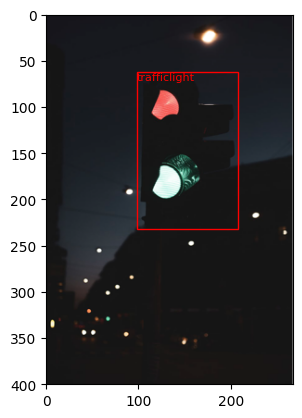

In [5]:
# Path to directory containing images and XML files
data_dir_images = "images/"
data_dir_annotations = "annotations/"

# Iterate through images and corresponding XML files
max_png_to_display = 1
curr_png  = 1

for filename in sorted(os.listdir(data_dir_images)):
    if curr_png > max_png_to_display:
        break
    if filename.endswith(".png"):
        image_file = os.path.join(data_dir_images, filename)
        print(image_file)
        xml_file = os.path.join(data_dir_annotations, filename.split('.')[0] + ".xml")
        print(xml_file)
        img_width, img_height, bounding_boxes = parse_xml(xml_file)
        plot_image_with_boxes(image_file, img_width, img_height, bounding_boxes)
    curr_png +=1